## Problem Description

It is important to know if a patient will be readmitted in some hospital. The reason is that you can change the treatment, in order to avoid a readmission.

In this database, we have 3 different outputs:

- No readmission;
- A readmission in less than 30 days (this situation is not good, because maybe your treatment was not appropriate);
- A readmission in more than 30 days (this one is not so good as well the last one, however, the reason can be the state of the patient.

# Coding 

### 1. Import Libraries

In [1]:
# General Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt


### 2. Read Data

In [2]:
df = pd.read_csv('/Users/ruchishukla/Downloads/diabetic_data 2.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### 3. Data Analysis, Visualization and Cleaning

<b>Shape of the data ?</b>

In [4]:
print('The shape of the Dataset is :', df.shape, 'with', df.shape[0], 'records and', df.shape[1], 'columns')

The shape of the Dataset is : (101766, 50) with 101766 records and 50 columns


<b>Check the columns of the dataset?</b>

In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

<b> Number of columns in the data?</b>

In [6]:
print('There are total', len(df.columns), 'columns in the dataset.')

There are total 50 columns in the dataset.


From the 50 columns 49 columns such as encounter_id, patient_nbr etc are the independent variables and the column name <b>"readmitted"</b> is the dependent variable and the label of the data. 

<b>Statistics of the Data ?</b>

In [7]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983458,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,101766,6,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,101766,10,?,98569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


<b> How many Null Values in Data? </b>

The data contains some null values, but null values are filled with "?". so we will look for '?' in each column for null values.

In [8]:
for i in df.columns:
    print(i, df[df[i] == '?'].shape[0])

encounter_id 0
patient_nbr 0
race 2273
gender 0
age 0
weight 98569
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40256
medical_specialty 49949
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


We can see that there are many null values in the columns like <b>"medical_specialty"</b> , <b>"race"</b> and <b>"payer_code"</b>. So we will have to fill these null values or drop the rows or columns with null values.  

We start analyzing columns sequentially and will drill down the data to look for insights. We will look for Number of Patients in the data. As we know we can check from the <b>"patient_nbr"</b> column that how many unique patients in the data.

In [9]:
print('There are', len(df['patient_nbr'].unique()), 'unique patients in the data.')

There are 71518 unique patients in the data.


In [10]:
print('There are', len(df['encounter_id'].unique()), 'unique encounters in the data.')

There are 101766 unique encounters in the data.


<b>Lets analyze the label column ?</b>

- First of All, Lets check the Distribution of Label column. 

In [11]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

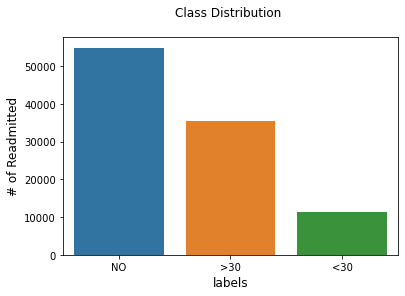

In [12]:
ax = sns.barplot(x=df['readmitted'].value_counts().index,   y=df['readmitted'].value_counts())
plt.xlabel('labels', size = 12)
plt.ylabel('# of Readmitted', size = 12)
plt.title('Class Distribution \n', size = 12)
plt.show()

- As Approximately 50% of the data belongs to the  "NO" class, and other classes have less labels.
- It will create class imbalance problem. So we will take this problem as 2 class problem.
- We will only try to predict if the patinet will readmitted or Not, We will skip the part of less than 30 days or greater than 30 days.

<b> Create 2 Class Label : </b> Created Another label to map <30 and >30 to 1 class for better Analysis and Classification.

In [13]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [14]:
# Created another column and take it as 2 class problem, Label the <30 and >30 as YES and Other "N0" as No.

def check_label(text):
    if text == '>30' or text =='<30':
        return 'Yes'
    else:
        return 'No'
    
df['readmitted_2'] =df['readmitted'].apply(check_label) 

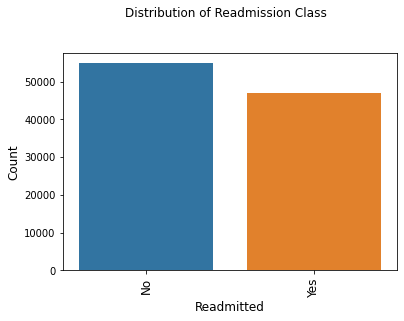

In [18]:
ax = sns.countplot(x='readmitted_2',   data= df)
plt.xlabel('Readmitted', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Readmission Class  \n\n', size = 12)
plt.show()

<b> Race Column</b>

Race featrure defines the race of the patient.
According to Documentaiton the values for race can be: 

- Caucasian 
- Asian
- African American  
- Hispanic
- other

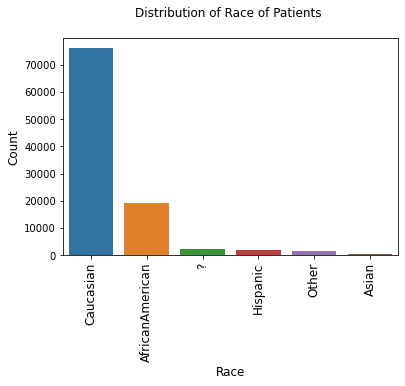

In [15]:
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

- The majority of the people are Caucasian, which are the people with european ancestry.

- There are "?" in the data which means the race contains the Null values.
- We will be needing to remove this from the data or we can also assign this with "Other" category.

In [16]:
df.loc[df['race'] == '?', 'race'] = 'Other'

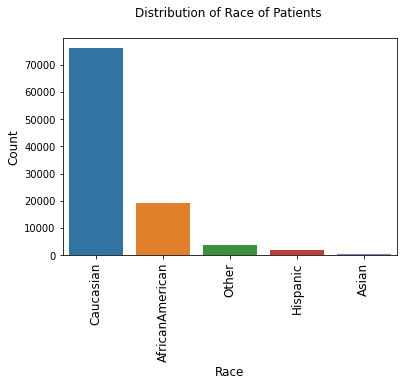

In [21]:
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

We replaced the Race containing value '?' with Other!

<b> What is the Gender Distribution in Data?</b>

According to Documentation, The values can be,

- male 
- female  
- unknown/invalid

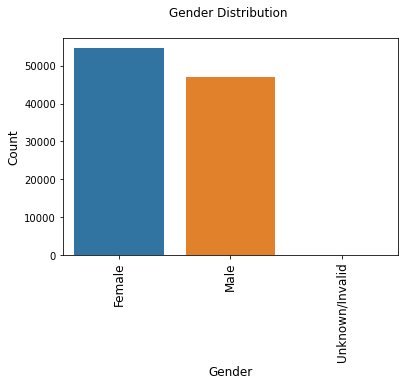

In [17]:
ax = sns.countplot(x='gender',   data= df)
plt.xlabel('Gender', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Gender Distribution \n', size = 12)
plt.show()

- We can see in the above figure that there are More than 50,000 Males in the data.
- Females are close to 48,000.
- There are some people whose gender is unknow, we can drop these rows as they are very few.

In [18]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

- There are only 3 Encounter for which we dont know the gender, It may create distribution error in the data. 
- So it is better to drop these rows from the data


In [19]:
df[df['gender']!='Unknown/Invalid']

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_2
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,No
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,No
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,No
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,Yes
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,No
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,No
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,Up,No,No,No,No,No,Ch,Yes,NO,No


In [20]:
# Drop the "Unknown/Invalid" gender of the data.
df.drop(df[df['gender'] == 'Unknown/Invalid'].index, inplace = True)

In [21]:
df.reset_index(inplace = True, drop = True)

In [22]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_2
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,No
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,No
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,No
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,No


<b>Relationship of Gender and Readmitted Overall</b>

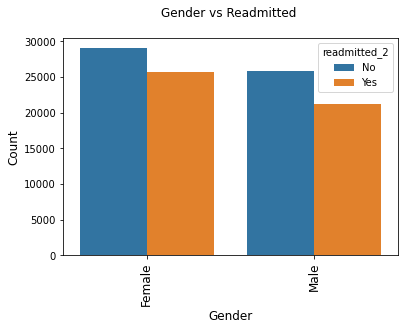

In [23]:
ax = sns.countplot(x="gender", hue="readmitted_2", data=df)
plt.xlabel('Gender', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Gender vs Readmitted \n', size = 12)
plt.show()

<b>What Age of People are there in data?</b>

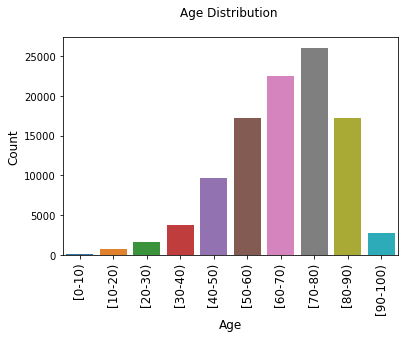

In [24]:
ax = sns.countplot(x='age',   data= df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Age Distribution \n', size = 12)
plt.show()

- As per the Literature, The problem of Readmission is common in Older People. 

<b>RelationShip Between and Age and Readmission ? </b>

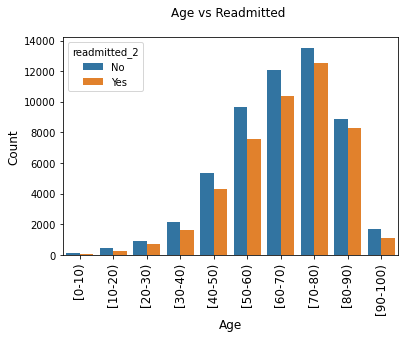

In [25]:
ax = sns.countplot(x="age", hue="readmitted_2", data=df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Age vs Readmitted \n', size = 12)
plt.show()

- As we mentioned above, The relationship of older Patients and Readmission is Strong as Mostly Older Patients are at high risk of Readmission.

- And you can also see from the data the Mostly Older Patient are Readmitted, and younger people not tend to readmit. 

<b> Lets Analyze Weight of the Patient ?</b>

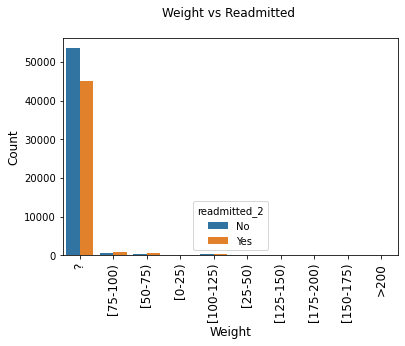

In [26]:
ax = sns.countplot(x="weight", hue="readmitted_2", data=df)
plt.xlabel('Weight', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Weight vs Readmitted \n', size = 12)
plt.show()

- From value Counts We can see that the from around 101000 records, 98569 records dont have Weight Value. 
- So, We will drop this column. 
- If we will try to fill this column it can disturb the distribution of the data.

In [27]:
# Lets drop this column. 
df.drop(columns = ['weight'], inplace = True)

<b>Understanding of admission_type_id column.</b>

As per the documentation, Integer identifier corresponding to 9 distinct values, for example:
- emergency
- urgent
- elective
- newborn
- not available

This represents the Type of Admission of the Patient, Which means in which department patient if admitted to at the time of encounter. 

As we dont have specific Id Defined even in the Documentation, we cannot map these value with Type for better undetstanding. 
We will only see if which ID have most Encounters.

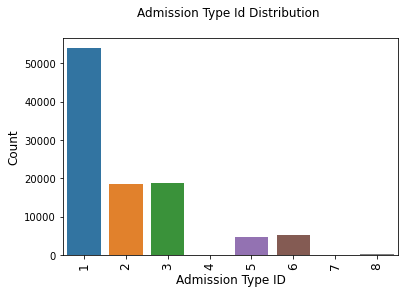

In [28]:
ax = sns.countplot(x='admission_type_id',   data= df)
plt.xlabel('Admission Type ID', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Admission Type Id Distribution \n', size = 12)
plt.show()

We can see in the above graph, The Id 1 have most of the encounters. From the literature review i assumed that the value should mean as Inpatient Encounter. Because mostly the Patients Admitted to the Inpatiet Department Readmitted after some Procedure. 

<b>What is the Discharge Disposition ?</b>

AS per the Documentation, Integer identifier corresponding to 29 distinct values, for example:
- discharged to home
- expired
- not available 

As per Literature, The Discharge Disposition means the facility to which patinet is discharged to. Patient can discharge to Home Health, etc. 

In [29]:
len(df['discharge_disposition_id'].unique())

26

There are 26 Discharge Disposition's in the data and we also dont have mapping for it.

<b>What is Admission Source ID? </b>


As per the Literature, Integer identifier corresponding to 21 distinct values, for example:
- physician referral,
- emergency room,  
- transfer from a hospital

Admission Source means, from which source the patient came? The Patient can come from Physician Referral and other Sources.

In [30]:
df['admission_source_id'].unique()  

array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [31]:
print('There are', len(df['admission_source_id'].unique()), 'unique Admission Sources from which patient can be admitted.')

There are 17 unique Admission Sources from which patient can be admitted.


<b>What is meaning of time_in_hospital? </b>


As per Literaure, it is Integer number of days between admission and discharge.

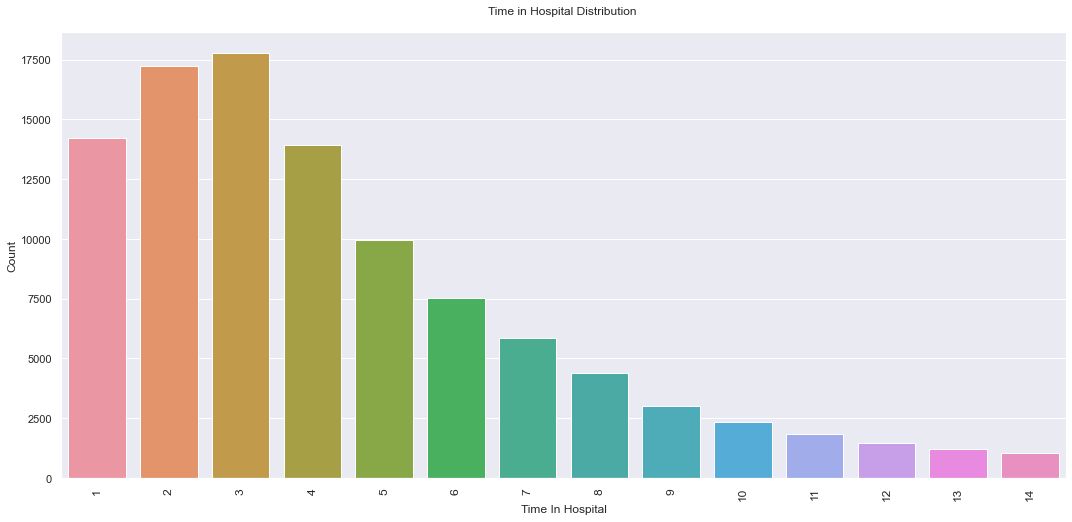

In [32]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='time_in_hospital',   data= df)
plt.xlabel('Time In Hospital', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Time in Hospital Distribution \n', size = 12)
plt.show()

In [33]:
df['time_in_hospital'].mean()

4.396018199149003

From the Graph and Mean of the Time in Hospital, We found that the majority of the people stays in hospital 2-4 Days.

<b>What is the Relation of Stay in Hospital and Readmission? </b>

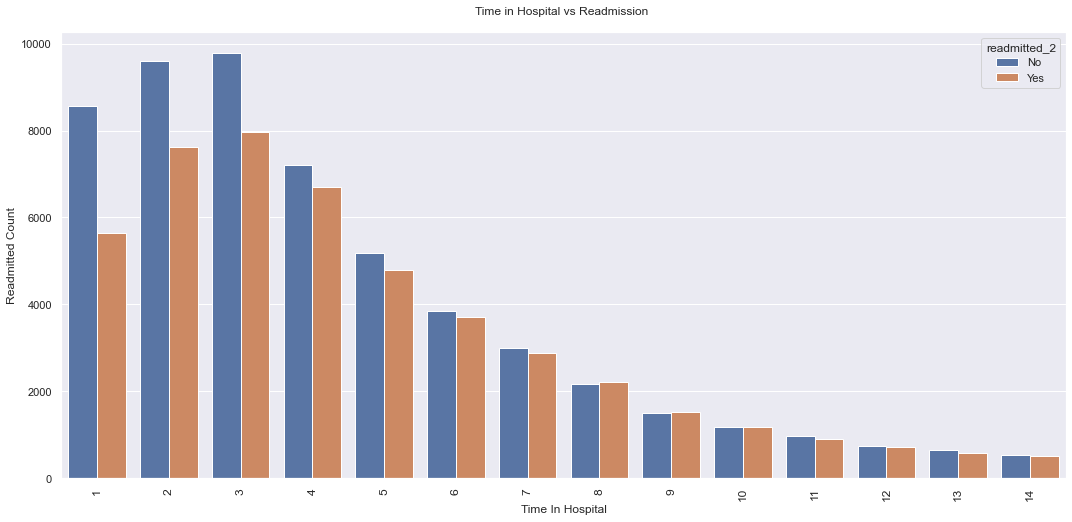

In [34]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='time_in_hospital',  hue= 'readmitted_2',  data= df)
plt.xlabel('Time In Hospital', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Time in Hospital vs Readmission \n', size = 12)
plt.show()

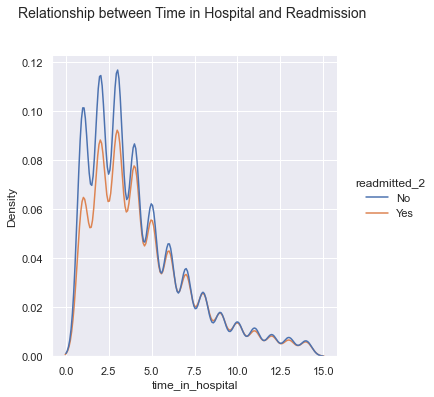

In [35]:
sns.set(rc={'figure.figsize':(18, 8.2)})
sns.displot(df, x="time_in_hospital", hue = 'readmitted_2', kind="kde")
plt.title('Relationship between Time in Hospital and Readmission \n\n', size  = 14)
plt.show()

Normal Time in Hospital for Not Readmitted and Readmitted is the same. This means that this parameter will not add value In our model.

<b> What is payer Code ?</b>

From the Literature, Integer identifier corresponding to 23 distinct values, for example:

- Blue Cross\BlueShield 
- Medicare,
- self-pay

This represent the payer of bill at the hospital. 

In [36]:
df['payer_code'].value_counts()

?     40255
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2531
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

We can see that there are <b>40256 </b> Empty values here, We will remove this column from the data. 


In [37]:
df.drop(columns = ['payer_code'], inplace = True)

<b>What is num_lab_procedures ? </b>

Number of lab tests performed during the encounter


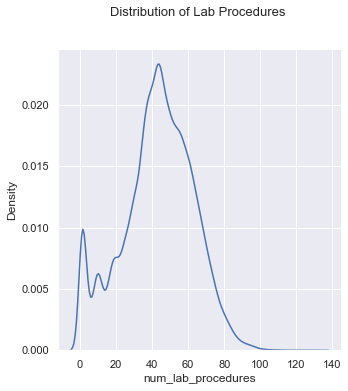

In [39]:
sns.displot(df, x="num_lab_procedures", kind="kde")
plt.title('Distribution of Lab Procedures \n\n', size = 13)
plt.show()

-  As we can see that from the distribution plot. That the majority of the Patients have around 30 to 50 Labs Procedures. Lets look at it with respect to class.   

<b>Trend of Lab Procedures with Readmission ?</b>

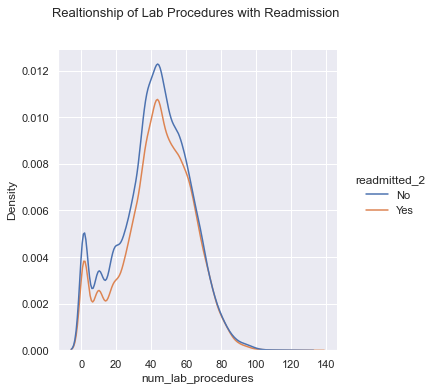

In [40]:
sns.displot(df, x="num_lab_procedures", hue= 'readmitted_2', kind="kde")
plt.title('Realtionship of Lab Procedures with Readmission \n\n', size = 13)
plt.show()

- The Distribution of Readmitted and Not Readmitted have the same trend.
- The number of labs procedures will not play a vital role in creating contrastive behaviour between Readmitted and Not Readmitted.

<b>What is the relation of Number of Procedures and Readmission? </b>

Number of procedures (other than lab tests) performed during the encounter

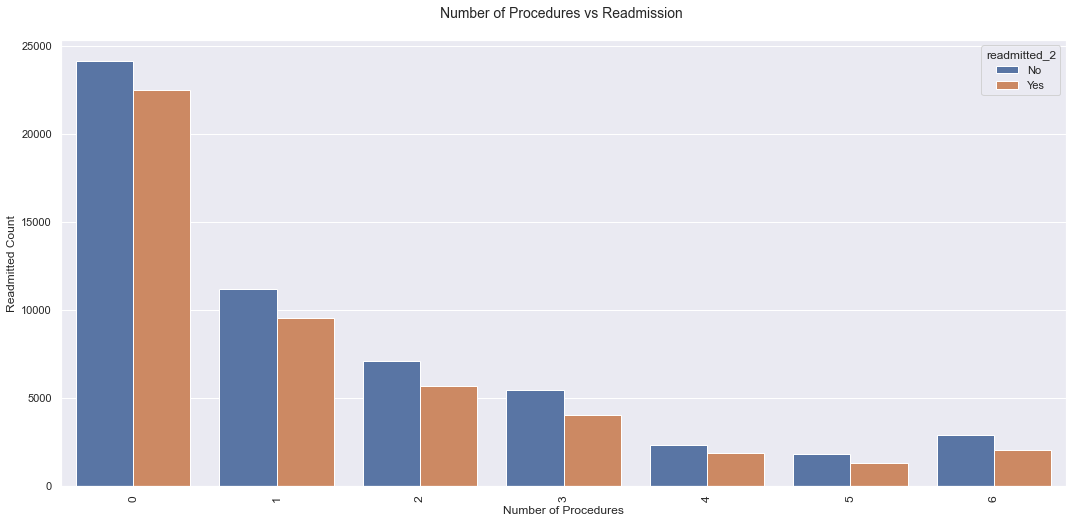

In [41]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='num_procedures',  hue= 'readmitted_2',  data= df)
plt.xlabel('Number of Procedures', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Number of Procedures vs Readmission \n', size = 14)
plt.show()

- Number of Procedures is also not giving some vital signs of readmission with increase in procedure. 
- Majority of patients have 0 procedures which are can be Readmitted and not Readmitted

As per the Documentation, they are the ICD - 9 Coded Diagnosis Codes, Each code represents some Disease.
- The diag_1 is the Primary Diagnosis of the Patient, which means the patient is admitted to the hospital on this diagnosis.
- The diag_2 is the Secondary Diagnosis, According to CMS Documentation  "Secondary diagnoses are “conditions that coexist at the time of admission, that develop subsequently, or that affect the treatment received and/or length of stay. These diagnoses are vital to documentation and have the potential to impact a patient's severity of illness and risk of mortality"
- The diag_2 is the Additional Secondary Diagnosis.

In [44]:
len(df['diag_1'].unique()), len(df['diag_2'].unique()), len(df['diag_3'].unique())

(717, 749, 790)

<b> As the unique values are too much. We can analyze the Top Diagnosis in Each Class!</b>

In [46]:
df[df['readmitted_2'] == 'Yes']['diag_1'].value_counts()

428    4057
414    2720
786    1709
486    1683
410    1438
       ... 
704       1
838       1
795       1
827       1
700       1
Name: diag_1, Length: 614, dtype: int64

<b>Top 20 Diagnosis in the Readmitted = YES </b>

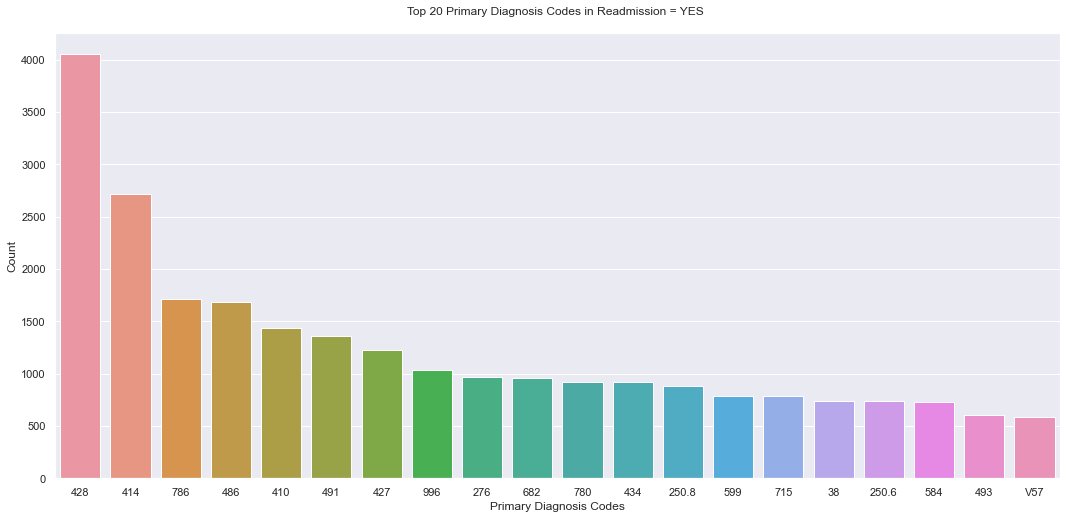

In [47]:
ax = sns.barplot(x=df[df['readmitted_2'] == 'Yes']['diag_1'].value_counts().index[:20],
                 y=df[df['readmitted_2'] == 'Yes']['diag_1'].value_counts()[:20])
plt.xlabel('Primary Diagnosis Codes', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Top 20 Primary Diagnosis Codes in Readmission = YES \n', size = 12)
plt.show()

The Top Diagnosis Codes are 428, 414 and 786 in the Readmitted Patients.
If we look at the ICD-9 Dictionary we will know that,
- 428 = Congestive heart failure
- 414 = Ischemic heart disease
- 786 = Symptoms involving respiratory system and other chest symptoms
- 486 = Pneumonia, organism unspecified 

So Patients with Heart Disease and Chest Disease are more likely to readmit to the hospital.

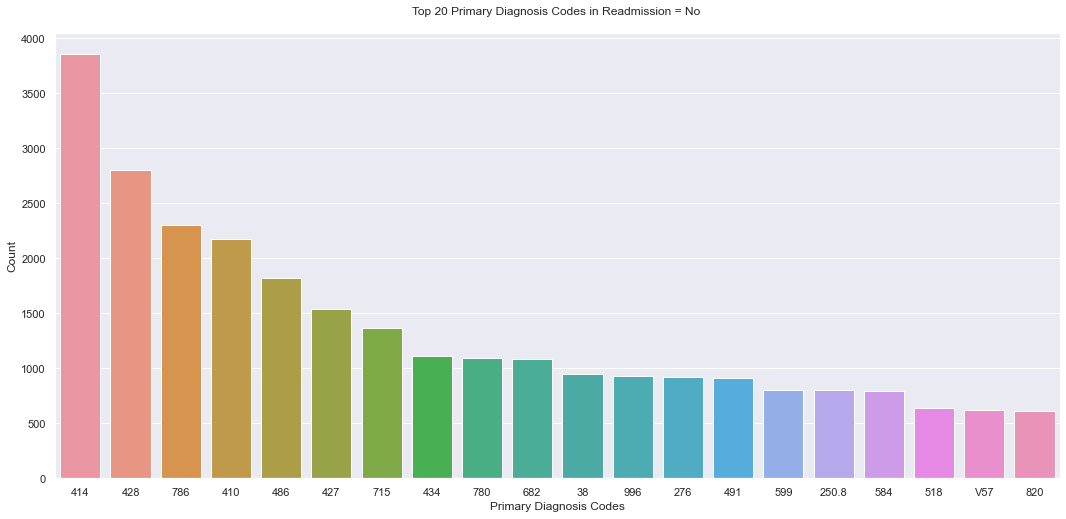

In [48]:
ax = sns.barplot(x=df[df['readmitted_2'] == 'No']['diag_1'].value_counts().index[:20],
                 y=df[df['readmitted_2'] == 'No']['diag_1'].value_counts()[:20])
plt.xlabel('Primary Diagnosis Codes', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Top 20 Primary Diagnosis Codes in Readmission = No \n', size = 12)
plt.show()

We can see from graph, Chest and Heart Diseases are also common in Patients who didnt Admitted.

<b> What is the behaviour of max_glu_serum ?</b>

Indicates the range of the result or if the test was not taken.
Values:
- “>200,”
- “>300,”
- “normal,”
- “none” if not measured

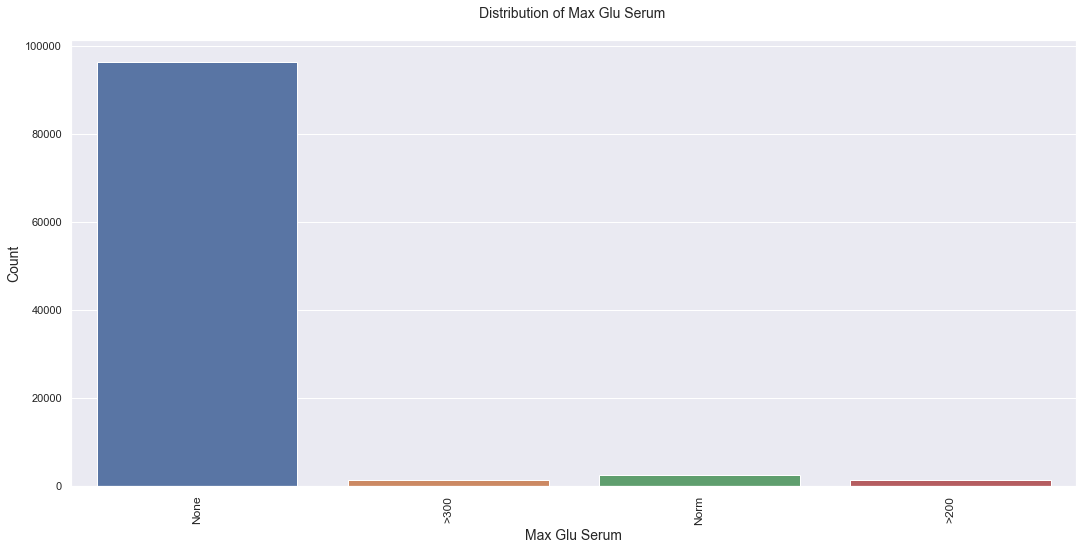

In [49]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='max_glu_serum',   data= df)
plt.xlabel('Max Glu Serum', size = 14)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 14)
plt.title('Distribution of Max Glu Serum \n', size = 14)
plt.show()

- None means the max_glu_serum  test is not taken and almost 96,000 patients didnt took this test.
- Lets analyze the trend of this for other 3 values with respect to Readmission

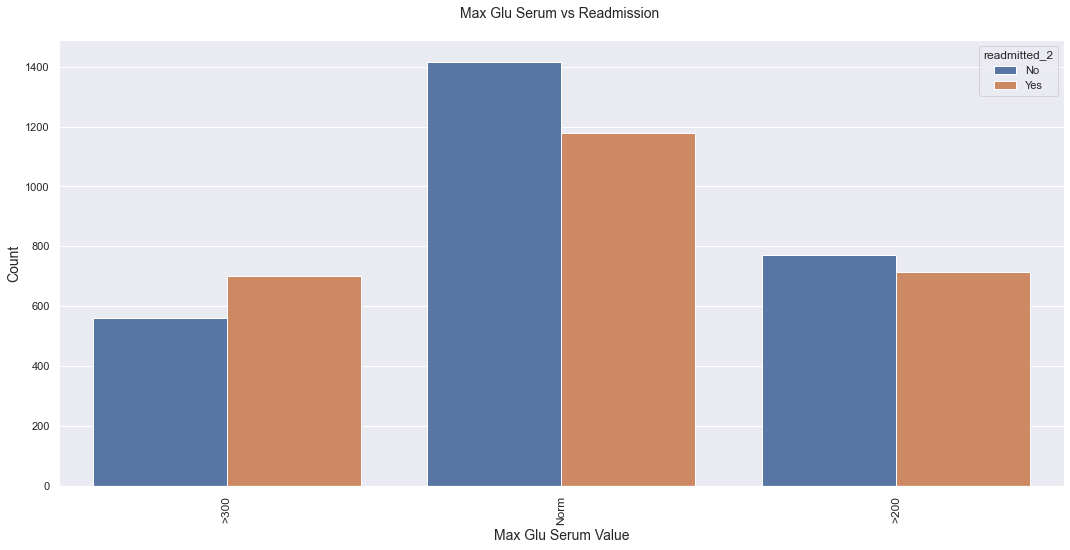

In [50]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='max_glu_serum',  hue= 'readmitted_2', data= df[df['max_glu_serum']!='None'])
plt.xlabel('Max Glu Serum Value', size = 14)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 14)
plt.title('Max Glu Serum vs Readmission \n', size = 14)
plt.show()

- We can see that if the value of max_glu_serum greater than 300 there is high chance of Readmission as per the above graph.

<b> What is A1Cresult ? </b>

Indicates the range of the result or if the test was not taken. 
Values:

- “>8” if the result was greater than 8%,
- “>7” if the result was greater than 7% but less than 8%,
- “normal” if the result was less than 7%,
- and “none” if not measured

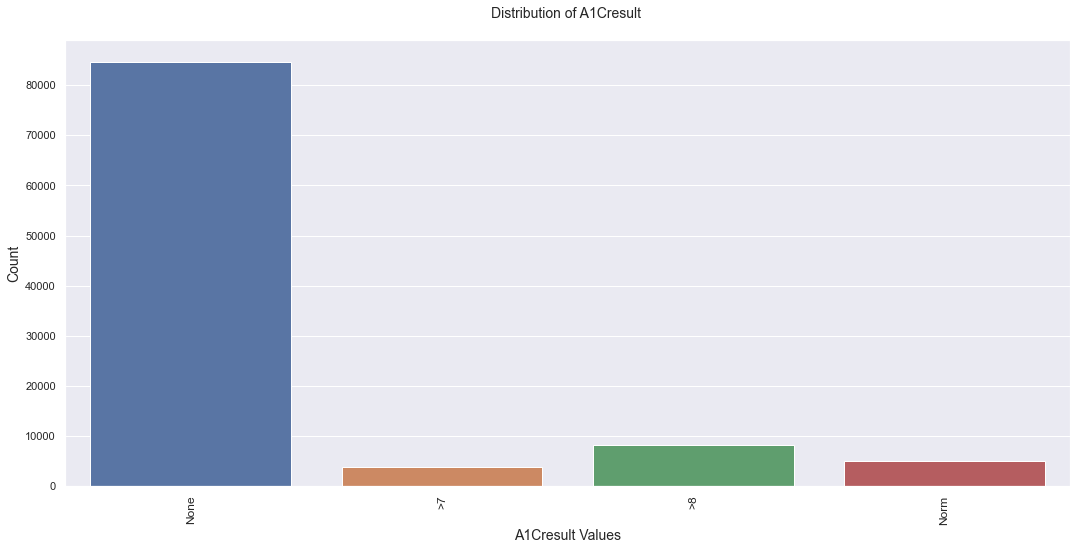

In [51]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='A1Cresult', data= df)
plt.xlabel('A1Cresult Values', size = 14)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 14)
plt.title('Distribution of A1Cresult \n', size = 14)
plt.show()

- Majority of the patients have None values, means this parameter if not measured. 
- Lets look at other 3 values and check the relationship

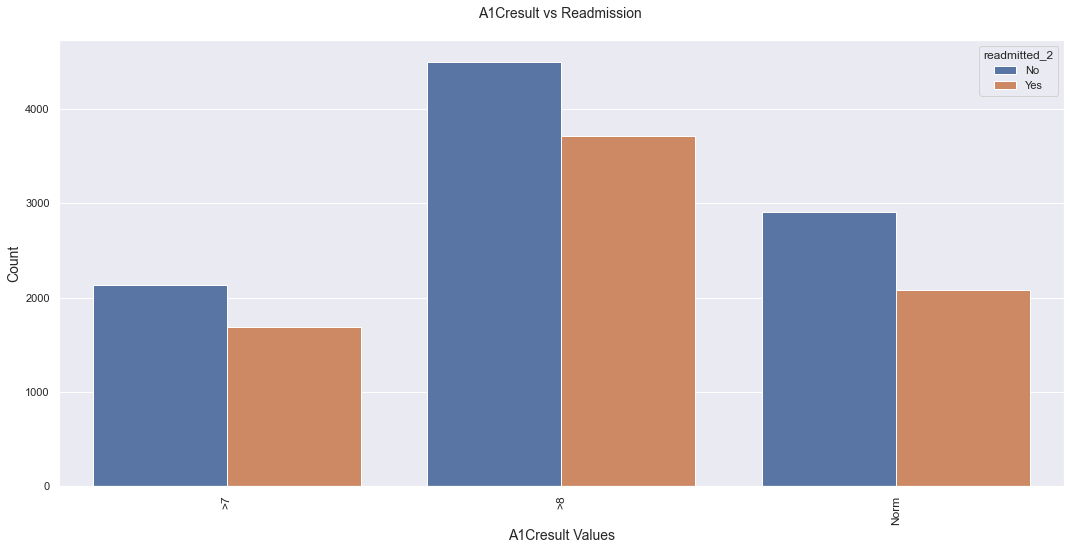

In [52]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='A1Cresult', hue = 'readmitted_2', data=df[df['A1Cresult']!='None'])
plt.xlabel('A1Cresult Values', size = 14)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 14)
plt.title('A1Cresult vs Readmission \n', size = 14)
plt.show()

There are more values values for Not Readmitted in each category. 

<b>What is change?</b>

Indicates if there was a change in diabetic medications (either dosage or generic
name). Values:

- “change”  
- “no change”

In [53]:
df['change'].value_counts()

No    54754
Ch    47009
Name: change, dtype: int64

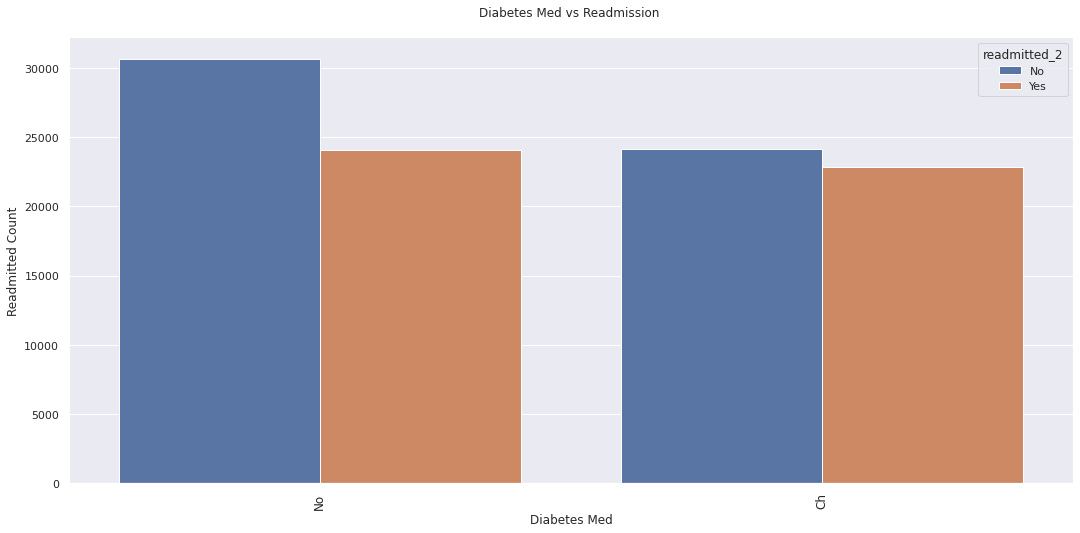

In [69]:
ax = sns.countplot(x='change',  hue= 'readmitted_2',  data= df)
plt.xlabel('Diabetes Med', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Diabetes Med vs Readmission \n', size = 12)
plt.show()

<b>What is Diabetes Med ? </b>

Indicates if there was any diabetic medication prescribed. Values:

- “yes”
- “no”

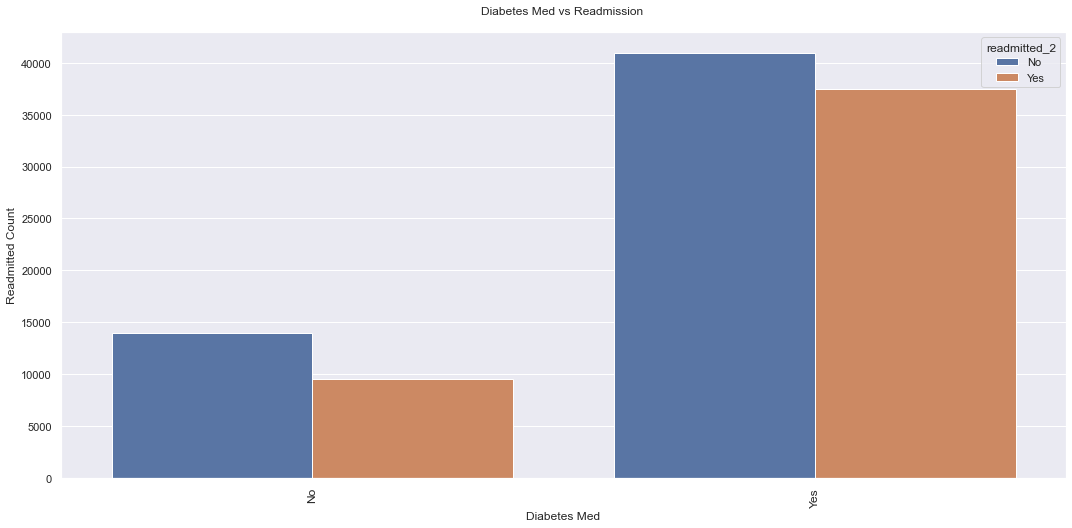

In [54]:
ax = sns.countplot(x='diabetesMed',  hue= 'readmitted_2',  data= df)
plt.xlabel('Diabetes Med', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Diabetes Med vs Readmission \n', size = 12)
plt.show()

- From above figure we can see that, the Patient with Diabetes have the high amount of readmissions.